In [1]:
! pip install matplotlib pandas seaborn intake intake_parquet

In [2]:
import pandas as pd
import seaborn as sns
import intake
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "sans"
plt.rcParams["font.size"] = 8
sns.set_palette('muted')

# Tutorial: Exploring Shot Metadata

This notebook contains a demonstration of plotting several of the summary statistics that accompany the shot metadata. 

Firstly, we're going to load all the shot data into a pandas dataframe:

In [3]:
catalog  = intake.open_catalog(f'https://mastapp.site/intake/catalog.yml')
df = pd.DataFrame(catalog.index.level1.shots().read())
summary = df.loc[df.campaign == 'M9']
summary

url  \
2700   s3://mast/level1/shots/29985.zarr   
3557   s3://mast/level1/shots/28643.zarr   
3683   s3://mast/level1/shots/28644.zarr   
3711   s3://mast/level1/shots/29986.zarr   
8585   s3://mast/level1/shots/28392.zarr   
...                                  ...   
11938  s3://mast/level1/shots/30467.zarr   
11939  s3://mast/level1/shots/30468.zarr   
11940  s3://mast/level1/shots/30469.zarr   
11941  s3://mast/level1/shots/30470.zarr   
11942  s3://mast/level1/shots/30471.zarr   

                                     preshot_description  \
2700                                    \nTF test shot\n   
3557                                         \nRepeat.\n   
3683                                         \nRepeat.\n   
3711                                         \nPF test\n   
8585              \nHL11, 300 ms, 2 V. He plenum 1047.\n   
...                                                  ...   
11938  \nRepeat with new neutron camera position.\ncH...   
11939  \nRepeat with new neutron camera position.\ncH...   
11940  \nRepeat with increased beam power (74 kV)\ncH...   
11941  \nRepeat last using hydrogen in outboard and c...   
11942  \nThe last plasma:\nConvert to i/b Helios 1724...   

                                    postshot_description campaign  \
2700                                              \nOK\n       M9   
3557                            \nP2 terminated early.\n       M9   
3683                            \nP2 terminated early.\n       M9   
3711                        \nRuncheck reports all OK!\n       M9   
8585                                             \nOk.\n       M9   
...                                                  ...      ...   
11938  \nTwo times lower DD neutron rate than referen...       M9   
11939                       \nGood beam.\nGood repeat.\n       M9   
11940                      \nGood shot. Modes present.\n       M9   
11941                                     \nNo HF gas.\n       M9   
11942                                     \nGood shot.\n       M9   

      current_range divertor_config           plasma_shape comissioner  \
2700           None    Conventional  Connected Double Null        None   
3557           None    Conventional  Connected Double Null        None   
3683           None    Conventional  Connected Double Null        None   
3711           None    Conventional  Connected Double Null        None   
8585           None    Conventional  Connected Double Null        None   
...             ...             ...                    ...         ...   
11938        700 kA    Conventional  Connected Double Null        None   
11939        700 kA    Conventional      Lower Single Null        None   
11940        700 kA    Conventional  Connected Double Null        None   
11941        700 kA    Conventional                   None        None   
11942        700 kA    Conventional      Lower Single Null        None   

      facility  shot_id  ... cpf_vol_ipmax cpf_vol_max  cpf_vol_truby  \
2700      MAST    29985  ...           NaN         NaN            NaN   
3557      MAST    28643  ...           NaN         NaN            NaN   
3683      MAST    28644  ...           NaN         NaN            NaN   
3711      MAST    29986  ...           NaN         NaN            NaN   
8585      MAST    28392  ...           NaN         NaN            NaN   
...        ...      ...  ...           ...         ...            ...   
11938     MAST    30467  ...      9.029202    9.046394            0.0   
11939     MAST    30468  ...      9.102411    9.107017            0.0   
11940     MAST    30469  ...      8.988730    9.047923            0.0   
11941     MAST    30470  ...      9.687049   10.055509            0.0   
11942     MAST    30471  ...      8.817559    9.283702            0.0   

       cpf_wmhd_ipmax cpf_wmhd_max cpf_wmhd_truby cpf_zeff_ipmax cpf_zeff_max  \
2700              NaN          NaN            NaN           None         None   
3557              NaN         

### Summary Statistics About Shots

Let's look at a summary of simple counts of different shot metadata.

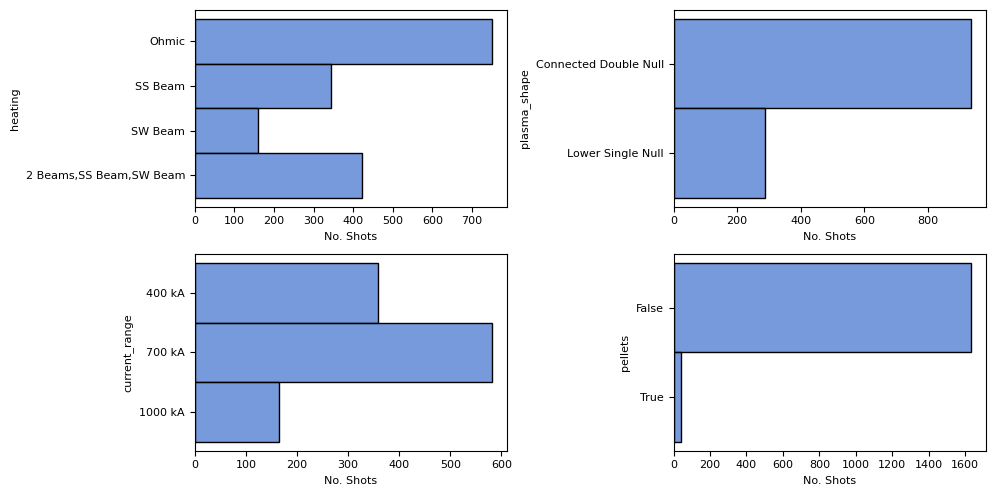

In [4]:

fig, axes = plt.subplots(2, 2, figsize=(10, 5))
ax1, ax2, ax3, ax4 = axes.flatten()

sns.histplot(summary, y='heating', ax=ax1)
sns.histplot(summary, y='plasma_shape', ax=ax2)
sns.histplot(y=summary.current_range, ax=ax3)
sns.histplot(y=summary.pellets.astype(str), ax=ax4)

for ax in axes.flatten():
    ax.set_xlabel('No. Shots')

plt.tight_layout()

### Plasma Beta ($\beta$) v.s Confinement Time ($\tau_E$)

This plot can show how the efficiency of energy confinement varies with plasma pressure.

Text(0.5, 0, 'Plasma Beta $\\beta$ (%)')

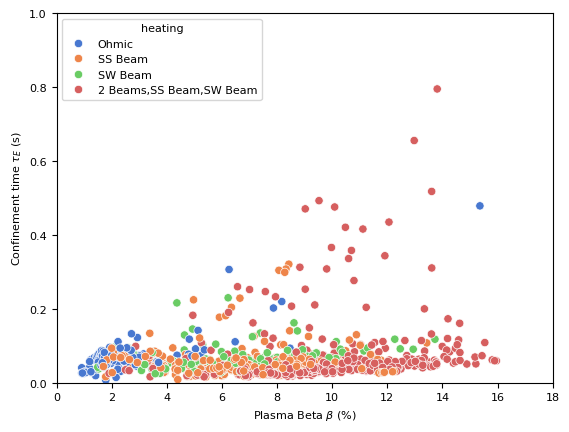

In [5]:
plt.figure()
sns.scatterplot(summary, y='cpf_tautot_max', x='cpf_betmhd_max', hue='heating')
plt.xlim(0, 18)
plt.ylim(0, 1)
# plt.yscale('log')
plt.ylabel('Confinement time $\\tau_E$ (s)')
plt.xlabel('Plasma Beta $\\beta$ (%)')

### Plasma Temperature ($T_e$) vs. Plasma Density ($n_e$)
This can reveal the relationship between temperature and density, which is critical for achieving the conditions necessary for fusion.

Text(0.5, 0, 'Density $n_e$ ($m^{-3}$)')

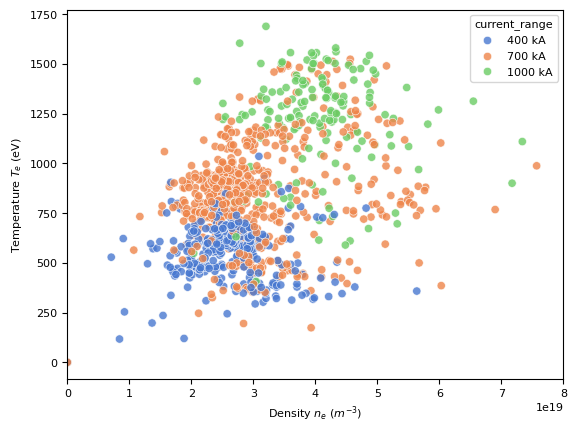

In [6]:
plt.figure()
sns.scatterplot(summary, y='cpf_te0_ipmax', x='cpf_ne0_ipmax', hue='current_range', alpha=0.8)
plt.xlim(0, .8e20)
plt.ylabel('Temperature $T_e$ (eV)')
plt.xlabel('Density $n_e$ ($m^{-3}$)')

### Plasma Current ($I_p$) vs. Confinement Time ($\tau_E$)

This can indicate how the plasma current affects the confinement time, providing insights into stability and performance.

Text(0, 0.5, 'Average Plasma Current  $I_p$ (kA)')

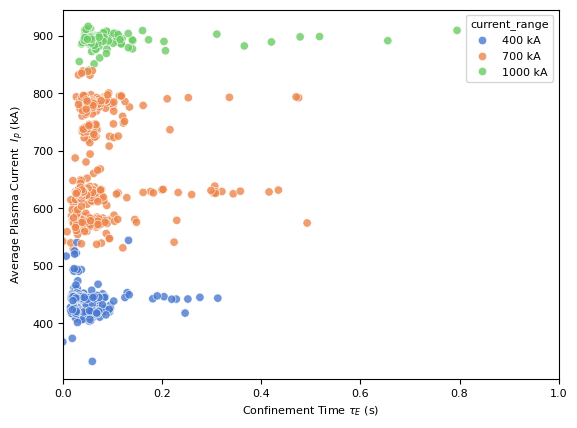

In [7]:
plt.figure()
sns.scatterplot(summary, y='cpf_ip_av', x='cpf_tautot_max', hue='current_range', alpha=0.8)
plt.xlim(0, 1)
plt.xlabel('Confinement Time $\\tau_E$ (s)')
plt.ylabel('Average Plasma Current  $I_p$ (kA)')